In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot
from keras.datasets import cifar10
import seaborn as sns


Dataset = tf.keras.datasets.cifar10
(train_dataset,train_labels),(test_dataset,test_labels) = Dataset.load_data() # Split the data
train_dataset=train_dataset/255.0 # Scale the dataset
test_dataset = test_dataset/255.0
train_dataset[0]



array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [2]:
train_dataset = train_dataset.reshape(len(train_dataset),32,32,3) #Reshaping the images into equal dim.
test_dataset = test_dataset.reshape(len(test_dataset),32,32,3)

In [3]:

train_dataset[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

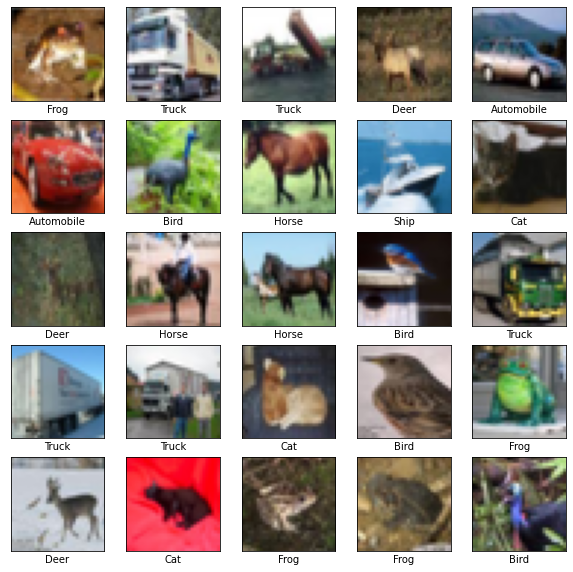

In [43]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5 ,5 ,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_dataset[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [47]:
import time
Baseline_model_starting_time=time.time() #Start counting time for model 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Baseline_model_history = model.fit(train_dataset, train_labels ,epochs=10, 
                    validation_data=(test_dataset, test_labels))

Epoch 1/10
1563/1563 [==============================] - 150s 95ms/step - loss: 1.3577 - accuracy: 0.5097 - val_loss: 1.1478 - val_accuracy: 0.5904
Epoch 2/10
1563/1563 [==============================] - 156s 100ms/step - loss: 1.0552 - accuracy: 0.6279 - val_loss: 1.0209 - val_accuracy: 0.6464
Epoch 3/10
1563/1563 [==============================] - 132s 84ms/step - loss: 0.9189 - accuracy: 0.6777 - val_loss: 1.0118 - val_accuracy: 0.6461
Epoch 4/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.8260 - accuracy: 0.7108 - val_loss: 0.9153 - val_accuracy: 0.6837
Epoch 5/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.7583 - accuracy: 0.7365 - val_loss: 0.8843 - val_accuracy: 0.7027
Epoch 6/10
1563/1563 [==============================] - 110s 71ms/step - loss: 0.7031 - accuracy: 0.7548 - val_loss: 0.8913 - val_accuracy: 0.7000
Epoch 7/10
1563/1563 [==============================] - 120s 77ms/step - loss: 0.6601 - accuracy: 0.7698 - val_loss: 

In [48]:
Baseline_Model_ending_time =time.time()
Baseline_Model_training_time= Baseline_Model_ending_time - Baseline_model_starting_time
print('Training took  ', Baseline_Model_training_time, ' seconds')

Training took   1270.784516096115  seconds


In [49]:
test_loss, test_acc = model.evaluate(test_dataset,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 4s - loss: 0.9203 - accuracy: 0.7162

Test accuracy: 0.7161999940872192


313/313 - 5s - loss: 0.9203 - accuracy: 0.7162


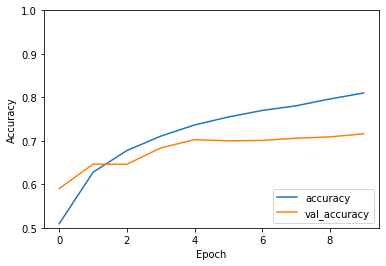

In [50]:
plt.plot(Baseline_model_history.history['accuracy'], label='accuracy')
plt.plot(Baseline_model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_dataset, test_labels, verbose=2)

In [51]:
# Make prediction 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_dataset)

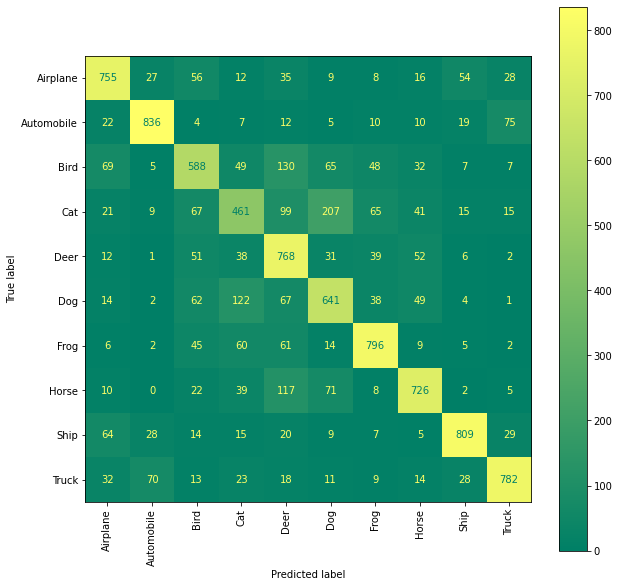

In [58]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_labels, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [59]:
# Classification report 
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1000
           1       0.85      0.84      0.84      1000
           2       0.64      0.59      0.61      1000
           3       0.56      0.46      0.50      1000
           4       0.58      0.77      0.66      1000
           5       0.60      0.64      0.62      1000
           6       0.77      0.80      0.79      1000
           7       0.76      0.73      0.74      1000
           8       0.85      0.81      0.83      1000
           9       0.83      0.78      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



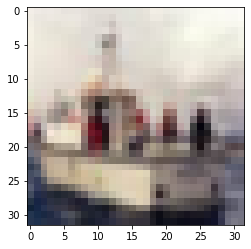

In [60]:
# Make prediction
my_image = test_dataset[88]
plt.imshow(my_image)

In [61]:
np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))

8

In [62]:
class_names[8]

'Ship'

In [64]:
# Evaluate model predictions 
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({class_names[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

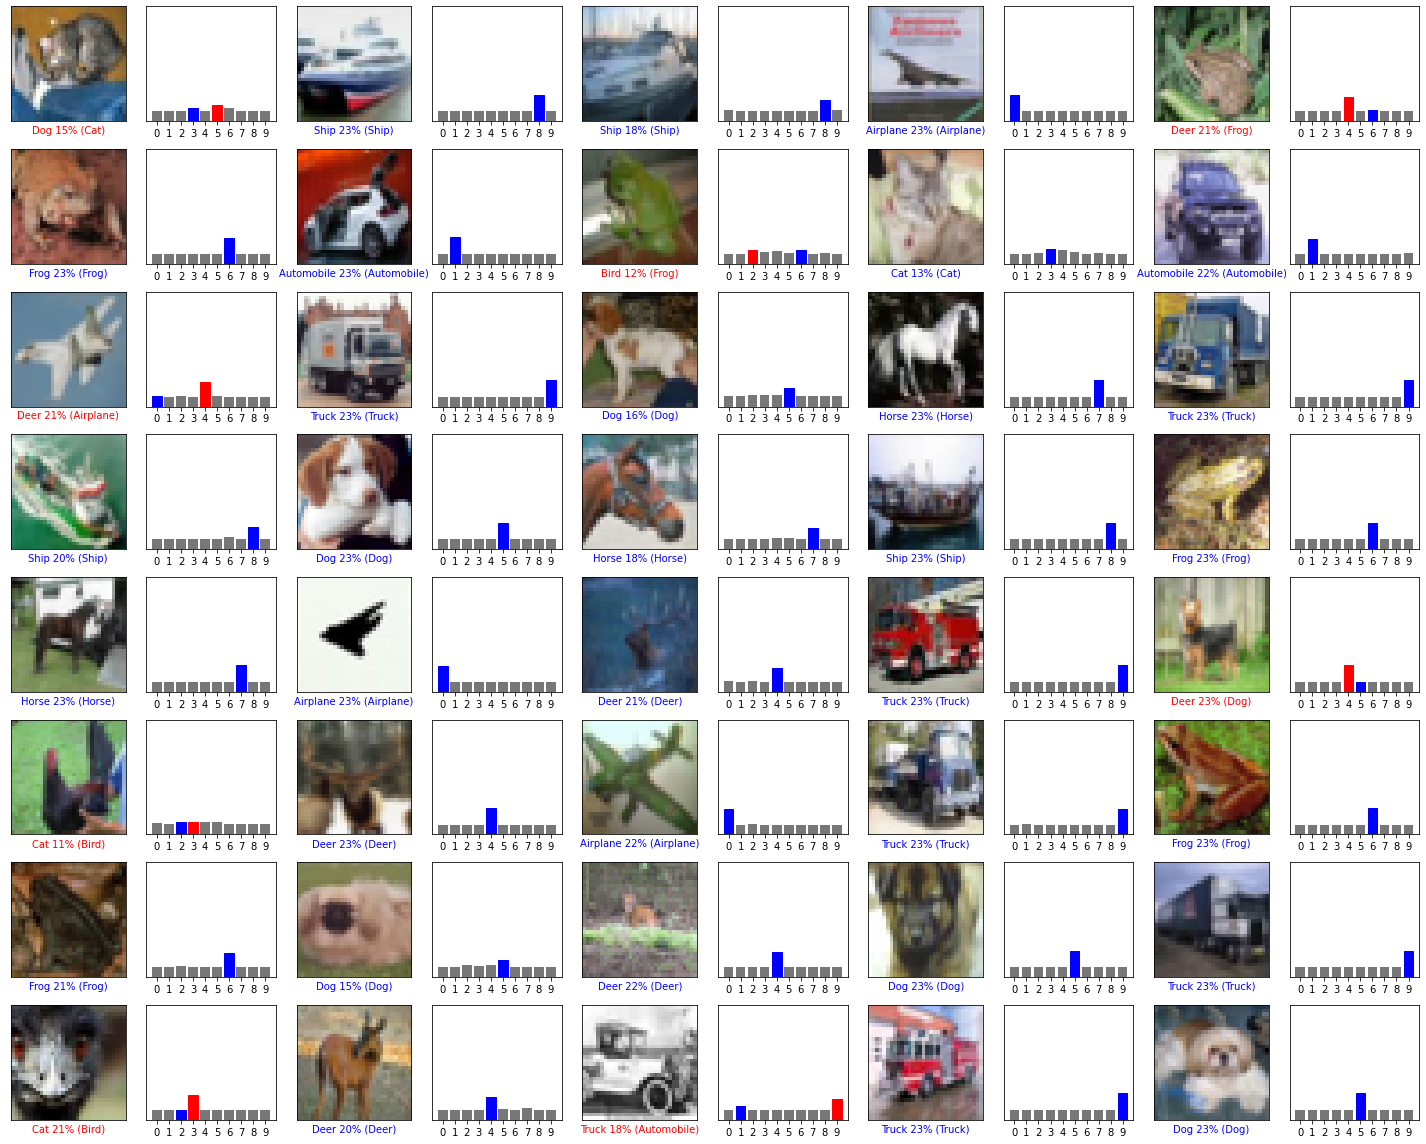

In [65]:
# Plot the first X test images, their predicted labels, and the true labels.
# Blue for correct predictions 
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_dataset)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [69]:
 # Best model using Random search 
def build_model(hp):
    Best_model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
         kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,3)),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),   
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
  
    keras.layers.Dense(10, activation='softmax')
    ])
    Best_model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return Best_model

In [70]:
from kerastuner import RandomSearch 
tuner = RandomSearch(build_model,
                    objective='val_accuracy',
                    max_trials = 5) #creating randomsearch object
tuner.search(train_dataset,train_labels,epochs=3,validation_data=(train_dataset,train_labels)) # search best parameter

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [71]:
Best_model =tuner.get_best_models(num_models=1)[0]
Best_model.summary() #summary of best model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 112)       8512      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 48)        48432     
_________________________________________________________________
flatten (Flatten)            (None, 32448)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4153472   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 4,211,706
Trainable params: 4,211,706
Non-trainable params: 0
_________________________________________________________________


In [233]:
import time
Best_Model_starting_time=time.time()
# model compile
Best_Model_history= Best_model.fit(test_dataset,test_labels,
          epochs=10,
          validation_split=0.1, initial_epoch=3)

Epoch 4/10
282/282 [==============================] - 74s 260ms/step - loss: 0.2342 - accuracy: 0.9326 - val_loss: 1.9081 - val_accuracy: 0.5860
Epoch 5/10
282/282 [==============================] - 78s 277ms/step - loss: 0.0512 - accuracy: 0.9889 - val_loss: 2.2906 - val_accuracy: 0.5810
Epoch 6/10
282/282 [==============================] - 87s 310ms/step - loss: 0.0165 - accuracy: 0.9979 - val_loss: 2.5782 - val_accuracy: 0.5960
Epoch 7/10
282/282 [==============================] - 82s 292ms/step - loss: 0.0055 - accuracy: 0.9993 - val_loss: 2.7609 - val_accuracy: 0.5870
Epoch 8/10
282/282 [==============================] - 75s 267ms/step - loss: 0.0299 - accuracy: 0.9919 - val_loss: 2.7530 - val_accuracy: 0.5650
Epoch 9/10
282/282 [==============================] - 71s 254ms/step - loss: 0.0074 - accuracy: 0.9991 - val_loss: 2.9345 - val_accuracy: 0.5700
Epoch 10/10
282/282 [==============================] - 62s 221ms/step - loss: 0.0036 - accuracy: 0.9997 - val_loss: 3.1307 - val_a

In [224]:
# Model testing 
test_loss, test_acc = Best_model.evaluate(test_dataset, test_labels, verbose=2)

313/313 - 11s - loss: 0.7093 - accuracy: 0.7791


In [227]:
Best_Model_ending_time =time.time()
Best_Model_training_time= Best_Model_ending_time - Best_Model_starting_time
print('Best model training took  ', Best_Model_training_time, ' seconds')

Best model training took   19812.37523818016  seconds


In [97]:
# Testing prediciton 
img = test_dataset[1] 
print(img.shape)

(32, 32, 3)


In [84]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 32, 32, 3)


In [85]:
predictions_single = Best_model.predict(img)
print(predictions_single)

[[5.7391584e-04 3.8355112e-03 5.0875574e-13 1.7964334e-13 1.8751094e-17
  2.0115493e-13 1.4019221e-09 1.0358745e-15 9.9559057e-01 6.3978267e-09]]


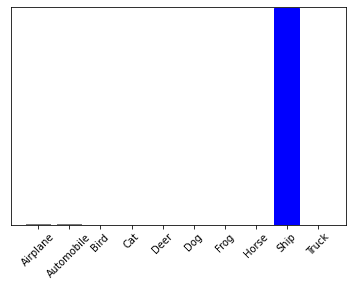

In [86]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [87]:
np.argmax(predictions_single[0])

8

In [89]:
class_names[8]

'Ship'

In [99]:
# Evaluate model predictions using Best model 
probability_model = tf.keras.Sequential([Best_model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_dataset)

In [101]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({class_names[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

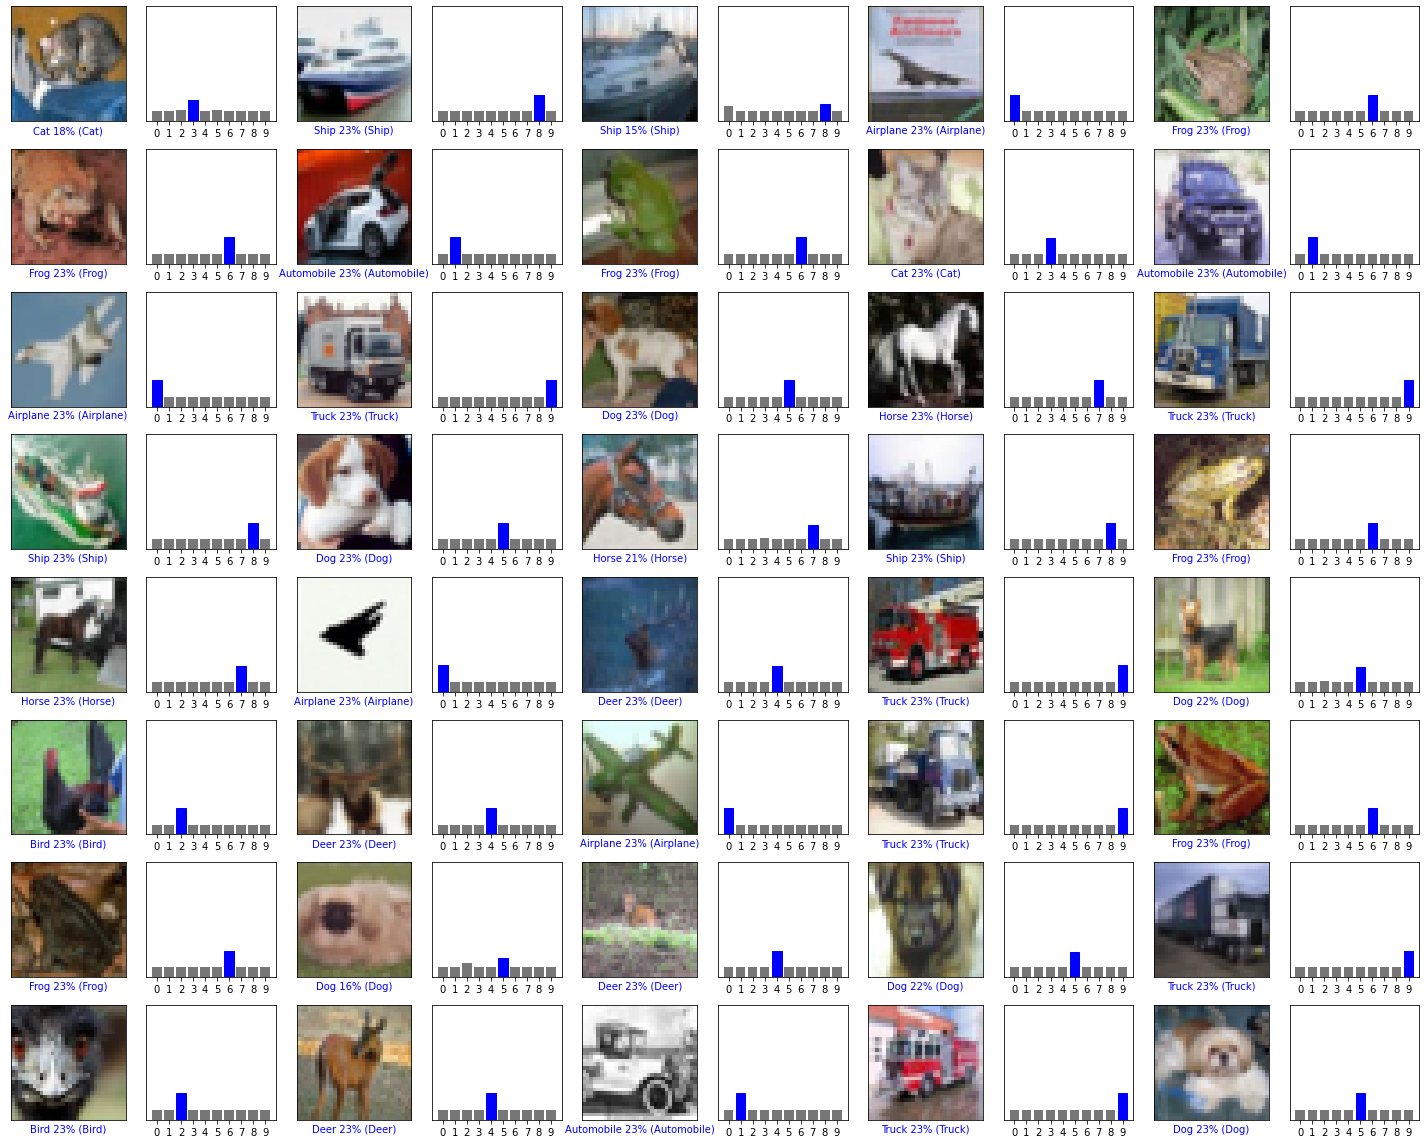

In [102]:
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_dataset)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [105]:
# baseline model with data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(train_dataset, train_labels, batch_size)
steps_per_epoch = train_dataset.shape[0]/ batch_size

Baseline_and_Data_Augmentation_starting_time = time.time()
Baseline_and_Data_Augmentation_history = model.fit(train_generator, 
              epochs=10,
              steps_per_epoch=steps_per_epoch,
              validation_data=(test_dataset, test_labels), 
              batch_size=batch_size,
             )

Epoch 1/10
1562/1562 [==============================] - 132s 85ms/step - loss: 0.8905 - accuracy: 0.6897 - val_loss: 0.8142 - val_accuracy: 0.7216
Epoch 2/10
1562/1562 [==============================] - 126s 81ms/step - loss: 0.8465 - accuracy: 0.7043 - val_loss: 0.8118 - val_accuracy: 0.7239
Epoch 3/10
1562/1562 [==============================] - 134s 86ms/step - loss: 0.8275 - accuracy: 0.7113 - val_loss: 0.8384 - val_accuracy: 0.7238
Epoch 4/10
1562/1562 [==============================] - 114s 73ms/step - loss: 0.8020 - accuracy: 0.7184 - val_loss: 0.8207 - val_accuracy: 0.7243
Epoch 5/10
1562/1562 [==============================] - 121s 77ms/step - loss: 0.7918 - accuracy: 0.7266 - val_loss: 0.7615 - val_accuracy: 0.7440
Epoch 6/10
1562/1562 [==============================] - 133s 85ms/step - loss: 0.7789 - accuracy: 0.7293 - val_loss: 0.8148 - val_accuracy: 0.7207
Epoch 7/10
1562/1562 [==============================] - 130s 83ms/step - loss: 0.7615 - accuracy: 0.7333 - val_loss: 0

In [229]:
Baseline_and_Data_Augmentation_ending_time =time.time()
Baseline_and_Data_Augmentation_training_time= Baseline_and_Data_Augmentation_ending_time - Baseline_and_Data_Augmentation_starting_time
print('Baseline with Data Augmentation training took:', Baseline_and_Data_Augmentation_training_time, ' seconds')

Baseline with Data Augmentation training took: 16235.689645051956  seconds


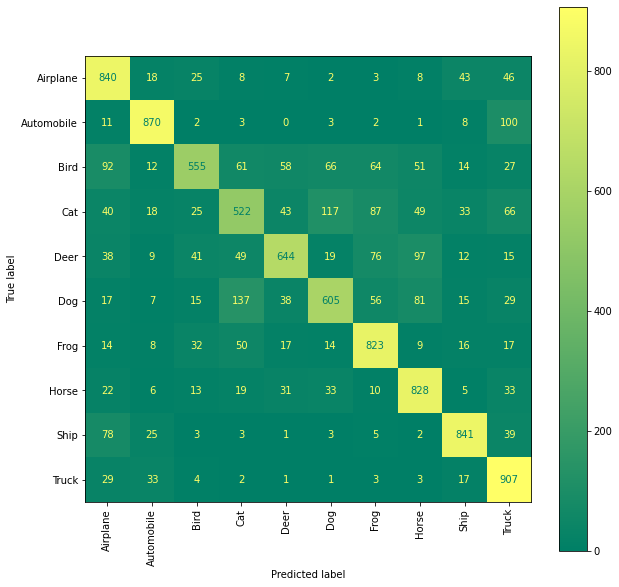

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_labels, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [110]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1000
           1       0.86      0.87      0.87      1000
           2       0.78      0.56      0.65      1000
           3       0.61      0.52      0.56      1000
           4       0.77      0.64      0.70      1000
           5       0.70      0.60      0.65      1000
           6       0.73      0.82      0.77      1000
           7       0.73      0.83      0.78      1000
           8       0.84      0.84      0.84      1000
           9       0.71      0.91      0.80      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [111]:
# Model 2 trying different architecture 
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [113]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
import time
Model2_starting_time = time.time()
Model2_history = model2.fit(train_dataset, train_labels ,epochs=10, 
                    validation_data=(test_dataset, test_labels))

Epoch 1/10
1563/1563 [==============================] - 134s 85ms/step - loss: 1.4624 - accuracy: 0.4693 - val_loss: 1.2738 - val_accuracy: 0.5370
Epoch 2/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.0954 - accuracy: 0.6158 - val_loss: 1.0776 - val_accuracy: 0.6308
Epoch 3/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.9330 - accuracy: 0.6752 - val_loss: 0.9662 - val_accuracy: 0.6656
Epoch 4/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.8280 - accuracy: 0.7118 - val_loss: 0.8853 - val_accuracy: 0.6972
Epoch 5/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.7415 - accuracy: 0.7414 - val_loss: 0.8969 - val_accuracy: 0.6947
Epoch 6/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.6762 - accuracy: 0.7639 - val_loss: 0.9039 - val_accuracy: 0.7009
Epoch 7/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.6154 - accuracy: 0.7846 - val_loss: 0.8547 

In [114]:
Model2_ending_time =time.time()
Model2_training_time= Model2_ending_time - Model2_starting_time
print('Model2 Training took  ', Model2_training_time, ' seconds')

Model2 Training took   1318.207279920578  seconds


313/313 - 7s - loss: 0.9526 - accuracy: 0.7145

Test accuracy: 0.7145000100135803


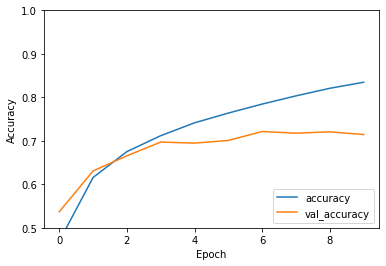

In [115]:
plt.plot(Model2_history.history['accuracy'], label='accuracy')
plt.plot(Model2_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model2.evaluate(test_dataset, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

In [116]:
# Model 3 Different architecture 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (1, 1), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

model3.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 128)         8320      
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [117]:
Model3_starting_time = time.time()
model3.compile (loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
Model3_history = model3.fit(train_dataset, train_labels ,epochs=10, 
                    validation_data=(test_dataset, test_labels))

Epoch 1/10
1563/1563 [==============================] - 203s 127ms/step - loss: 1.4294 - accuracy: 0.4866 - val_loss: 1.1556 - val_accuracy: 0.5959
Epoch 2/10
1563/1563 [==============================] - 187s 120ms/step - loss: 1.0790 - accuracy: 0.6227 - val_loss: 0.9851 - val_accuracy: 0.6559
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9351 - accuracy: 0.6732 - val_loss: 0.9494 - val_accuracy: 0.6685
Epoch 4/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.8415 - accuracy: 0.7070 - val_loss: 0.9184 - val_accuracy: 0.6800
Epoch 5/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7588 - accuracy: 0.7349 - val_loss: 0.9465 - val_accuracy: 0.6794
Epoch 6/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.6934 - accuracy: 0.7597 - val_loss: 0.8770 - val_accuracy: 0.7037
Epoch 7/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.6288 - accuracy: 0.7794 - val_loss: 0.

In [118]:
Model3_ending_time =time.time()
Model3_training_time= Model3_ending_time - Model3_starting_time
print('Model3_aug Training took  ', Model3_training_time, ' seconds')

Model3_aug Training took   1243.5414199829102  seconds


In [225]:
test_loss, test_acc = model3.evaluate(test_dataset, test_labels, verbose=2)

313/313 - 2s - loss: 1.7176 - accuracy: 0.7107


In [119]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
early_stop = EarlyStopping(monitor='val_loss', patience=2)
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(train_dataset, train_labels, batch_size)
steps_per_epoch = train_dataset.shape[0] // batch_size

model3_es_history = model3.fit(train_generator, 
              epochs=10,
              steps_per_epoch=steps_per_epoch,
              validation_data=(test_dataset, test_labels), 
              callbacks=[early_stop],
               batch_size=batch_size,
             )

Epoch 1/10
1562/1562 [==============================] - 109s 69ms/step - loss: 0.9470 - accuracy: 0.6690 - val_loss: 0.8710 - val_accuracy: 0.7022
Epoch 2/10
1562/1562 [==============================] - 122s 78ms/step - loss: 0.8885 - accuracy: 0.6909 - val_loss: 0.8635 - val_accuracy: 0.7074
Epoch 3/10
1562/1562 [==============================] - 149s 96ms/step - loss: 0.8602 - accuracy: 0.6991 - val_loss: 0.8407 - val_accuracy: 0.7175
Epoch 4/10
1562/1562 [==============================] - 144s 92ms/step - loss: 0.8335 - accuracy: 0.7091 - val_loss: 0.7972 - val_accuracy: 0.7320
Epoch 5/10
1562/1562 [==============================] - 145s 93ms/step - loss: 0.8136 - accuracy: 0.7143 - val_loss: 0.8010 - val_accuracy: 0.7269
Epoch 6/10
1562/1562 [==============================] - 134s 86ms/step - loss: 0.7909 - accuracy: 0.7236 - val_loss: 0.8046 - val_accuracy: 0.7293


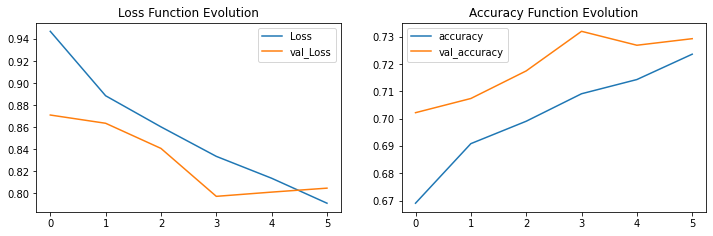

In [120]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(model3_es_history.history['loss'], label='Loss')
plt.plot(model3_es_history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(model3_es_history.history['accuracy'], label='accuracy')
plt.plot(model3_es_history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [121]:
evaluation = model3.evaluate(test_dataset, test_labels)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 5s 15ms/step - loss: 0.8046 - accuracy: 0.7293
Test Accuracy : 72.93%


In [4]:
# New model 4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model4 = Sequential()
model4.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.25))
model4.add(Dense(10, activation='softmax'))

model4.summary()


2022-05-09 12:19:06.770454: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [7]:
import time
Model4_starting_time = time.time()

model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
Model4_history = model4.fit(train_dataset, train_labels ,epochs=10, 
                    validation_data=(test_dataset, test_labels))

2022-05-09 12:20:20.684881: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1563/1563 [==============================] - 646s 412ms/step - loss: 1.5125 - accuracy: 0.4623 - val_loss: 1.2021 - val_accuracy: 0.5749
Epoch 2/10
1563/1563 [==============================] - 678s 434ms/step - loss: 1.0645 - accuracy: 0.6271 - val_loss: 0.9410 - val_accuracy: 0.6736
Epoch 3/10
1563/1563 [==============================] - 691s 442ms/step - loss: 0.8901 - accuracy: 0.6934 - val_loss: 0.8569 - val_accuracy: 0.7112
Epoch 4/10
1563/1563 [==============================] - 672s 430ms/step - loss: 0.7932 - accuracy: 0.7292 - val_loss: 0.8527 - val_accuracy: 0.7178
Epoch 5/10
1563/1563 [==============================] - 564s 361ms/step - loss: 0.7108 - accuracy: 0.7582 - val_loss: 0.7216 - val_accuracy: 0.7553
Epoch 6/10
1563/1563 [==============================] - 604s 386ms/step - loss: 0.6575 - accuracy: 0.7768 - val_loss: 0.7012 - val_accuracy: 0.7701
Epoch 7/10
1563/1563 [==============================] - 633s 405ms/step - loss: 0.6075 - accuracy: 0.7936 - val_

313/313 - 19s - loss: 0.5442 - accuracy: 0.8199


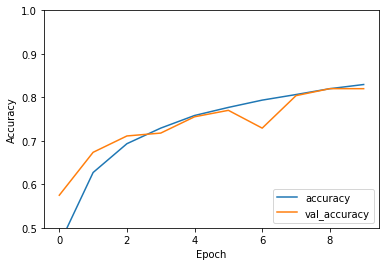

In [8]:
plt.plot(Model4_history.history['accuracy'], label='accuracy')
plt.plot(Model4_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model4.evaluate(test_dataset, test_labels, verbose=2)

In [9]:
Model4_ending_time =time.time()
Model4_training_time= Model4_ending_time - Model4_starting_time
print('model4 Training took  ', Model4_training_time, ' seconds')

model4 Training took   6201.636602163315  seconds


In [126]:
Model5_starting_time = time.time()

model3.compile (loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics=['accuracy'])


Model5_history = model3.fit(train_dataset, train_labels ,epochs=10, 
                    validation_data=(test_dataset, test_labels))

Epoch 1/10
1563/1563 [==============================] - 149s 90ms/step - loss: 0.5397 - accuracy: 0.8101 - val_loss: 0.8176 - val_accuracy: 0.7386
Epoch 2/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.4491 - accuracy: 0.8417 - val_loss: 0.9633 - val_accuracy: 0.7203
Epoch 3/10
1563/1563 [==============================] - 132s 84ms/step - loss: 0.3917 - accuracy: 0.8619 - val_loss: 0.9710 - val_accuracy: 0.7328
Epoch 4/10
1563/1563 [==============================] - 129s 82ms/step - loss: 0.3436 - accuracy: 0.8799 - val_loss: 1.0164 - val_accuracy: 0.7283
Epoch 5/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.3032 - accuracy: 0.8925 - val_loss: 1.1104 - val_accuracy: 0.7210
Epoch 6/10
1563/1563 [==============================] - 104s 66ms/step - loss: 0.2719 - accuracy: 0.9046 - val_loss: 1.2728 - val_accuracy: 0.7230
Epoch 7/10
1563/1563 [==============================] - 233s 149ms/step - loss: 0.2432 - accuracy: 0.9156 - val_loss: 

In [132]:
Model5_ending_time =time.time()
Model5_training_time= Model5_ending_time - Model5_starting_time
print('Model5 Training took  ', Model5_training_time, ' seconds')

Model5 Training took   1520.6293060779572  seconds


In [135]:
from tabulate import tabulate
l = [["Baseline model training time ", Baseline_Model_training_time], ["Best model training time ", Best_Model_training_time], ["Baseline model with Data Augmentation training time", Baseline_and_Data_Augmentation_training_time],
["Model 2 training time", Model2_training_time], ["Model3 training time ", Model3_training_time], ["Model4 training time ", Model4_training_time], ["Model5 training time ", Model5_training_time]]
table = tabulate(l, headers=['Model', 'Training time'], tablefmt='orgtbl')

print(table)

| Model                                               |   Training time |
|-----------------------------------------------------+-----------------|
| Baseline model training time                        |        1270.78  |
| Best model training time                            |         747.842 |
| Baseline model with Data Augmentation training time |        1768.82  |
| Model 2 training time                               |        1318.21  |
| Model3 training time                                |        1243.54  |
| Model4 training time                                |        1228.58  |
| Model5 training time                                |        1520.63  |


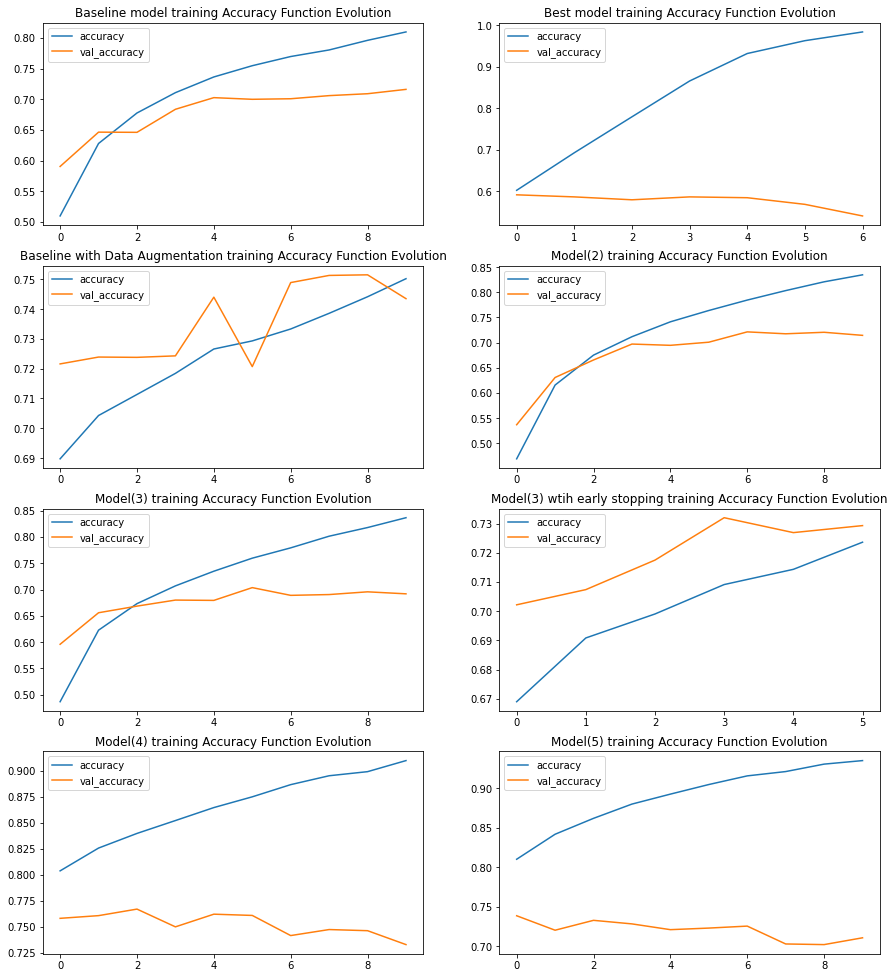

In [220]:
plt.figure(figsize=(15,35))

plt.subplot(8, 2, 1)
plt.plot(Baseline_model_history.history['accuracy'], label='accuracy')
plt.plot(Baseline_model_history.history['val_accuracy'], label='val_accuracy')
plt.title('Baseline model training Accuracy Function Evolution')
plt.legend()

plt.subplot(8, 2, 2)
plt.plot(Best_Model_history.history['accuracy'], label='accuracy')
plt.plot(Best_Model_history.history['val_accuracy'], label='val_accuracy')
plt.title('Best model training Accuracy Function Evolution')
plt.legend()

plt.subplot(8, 2, 3)
plt.plot(Baseline_and_Data_Augmentation_history.history['accuracy'], label='accuracy')
plt.plot(Baseline_and_Data_Augmentation_history.history['val_accuracy'], label='val_accuracy')
plt.title('Baseline with Data Augmentation training Accuracy Function Evolution')
plt.legend()

plt.subplot(8, 2, 4)
plt.plot(Model2_history.history['accuracy'], label='accuracy')
plt.plot(Model2_history.history['val_accuracy'], label='val_accuracy')
plt.title('Model(2) training Accuracy Function Evolution')
plt.legend()


plt.subplot(8, 2, 5)
plt.plot(Model3_history.history['accuracy'], label='accuracy')
plt.plot(Model3_history.history['val_accuracy'], label='val_accuracy')
plt.title('Model(3) training Accuracy Function Evolution')
plt.legend()

plt.subplot(8, 2, 6)
plt.plot(model3_es_history.history['accuracy'], label='accuracy')
plt.plot(model3_es_history.history['val_accuracy'], label='val_accuracy')
plt.title('Model(3) wtih Early Stopping Training Accuracy Function Evolution')
plt.legend()

plt.subplot(8, 2, 7)
plt.plot(Model4_history.history['accuracy'], label='accuracy')
plt.plot(Model4_history.history['val_accuracy'], label='val_accuracy')
plt.title('Model(4) Training Accuracy Function Evolution')
plt.legend()
plt.subplot(8, 2, 8)
plt.plot(Model5_history.history['accuracy'], label='accuracy')
plt.plot(Model5_history.history['val_accuracy'], label='val_accuracy')
plt.title('Model(5) Training Accuracy Function Evolution')
plt.legend()



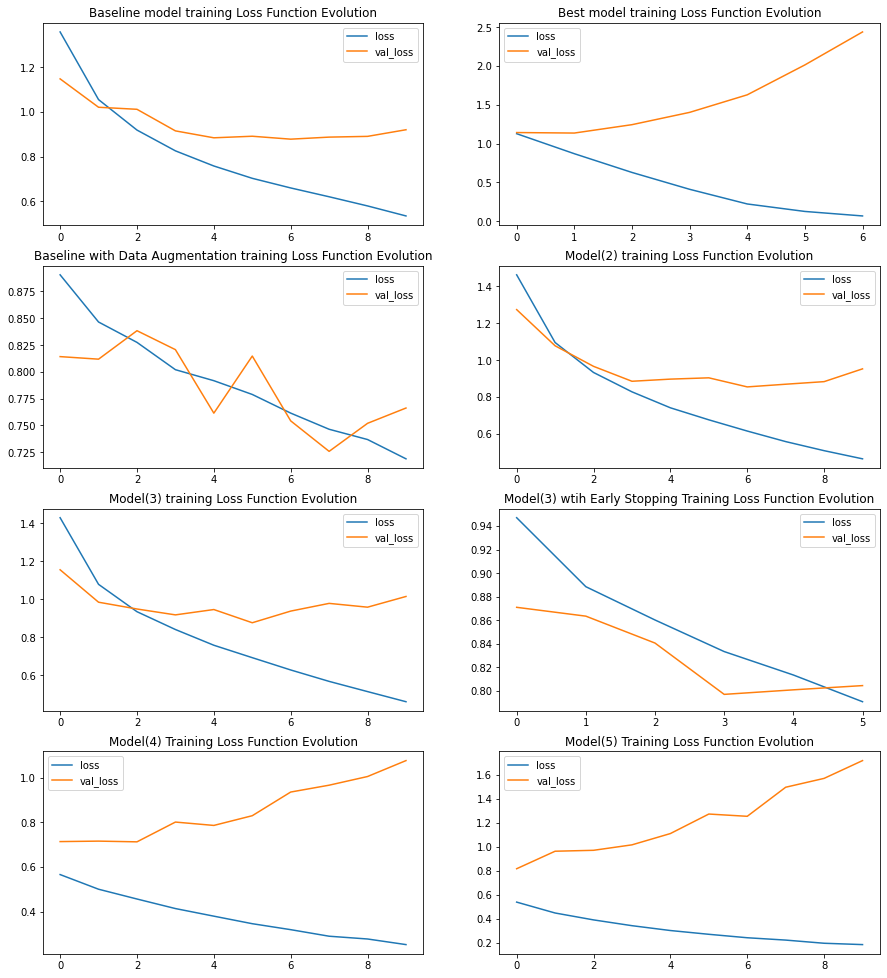

In [222]:
plt.figure(figsize=(15,35))

plt.subplot(8, 2, 1)
plt.plot(Baseline_model_history.history['loss'], label='loss')
plt.plot(Baseline_model_history.history['val_loss'], label='val_loss')
plt.title('Baseline model training Loss Function Evolution')
plt.legend()

plt.subplot(8, 2, 2)
plt.plot(Best_Model_history.history['loss'], label='loss')
plt.plot(Best_Model_history.history['val_loss'], label='val_loss')
plt.title('Best model training Loss Function Evolution')
plt.legend()

plt.subplot(8, 2, 3)
plt.plot(Baseline_and_Data_Augmentation_history.history['loss'], label='loss')
plt.plot(Baseline_and_Data_Augmentation_history.history['val_loss'], label='val_loss')
plt.title('Baseline with Data Augmentation training Loss Function Evolution')
plt.legend()

plt.subplot(8, 2, 4)
plt.plot(Model2_history.history['loss'], label='loss')
plt.plot(Model2_history.history['val_loss'], label='val_loss')
plt.title('Model(2) training Loss Function Evolution')
plt.legend()


plt.subplot(8, 2, 5)
plt.plot(Model3_history.history['loss'], label='loss')
plt.plot(Model3_history.history['val_loss'], label='val_loss')
plt.title('Model(3) training Loss Function Evolution')
plt.legend()

plt.subplot(8, 2, 6)
plt.plot(model3_es_history.history['loss'], label='loss')
plt.plot(model3_es_history.history['val_loss'], label='val_loss')
plt.title('Model(3) wtih Early Stopping Training Loss Function Evolution')
plt.legend()

plt.subplot(8, 2, 7)
plt.plot(Model4_history.history['loss'], label='loss')
plt.plot(Model4_history.history['val_loss'], label='val_loss')
plt.title('Model(4) Training Loss Function Evolution')
plt.legend()
plt.subplot(8, 2, 8)
plt.plot(Model5_history.history['loss'], label='loss')
plt.plot(Model5_history.history['val_loss'], label='val_loss')
plt.title('Model(5) Training Loss Function Evolution')
plt.legend()

In [238]:
Model6_starting_time = time.time()
# Model compiling
model4.compile (loss='sparse_categorical_crossentropy', optimizer= keras.optimizers.Adam(learning_rate=1E-4), metrics=['accuracy'])
# Model training 
Model6_history = model3.fit(train_dataset, train_labels , epochs=10,  
                    validation_data=(test_dataset, test_labels))

Epoch 1/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.1735 - accuracy: 0.9393 - val_loss: 1.6985 - val_accuracy: 0.7160
Epoch 2/10
1563/1563 [==============================] - 127s 81ms/step - loss: 0.1619 - accuracy: 0.9447 - val_loss: 1.8859 - val_accuracy: 0.7007
Epoch 3/10
1563/1563 [==============================] - 110s 71ms/step - loss: 0.1593 - accuracy: 0.9462 - val_loss: 2.0996 - val_accuracy: 0.7074
Epoch 4/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.1512 - accuracy: 0.9502 - val_loss: 1.9899 - val_accuracy: 0.7095
Epoch 5/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.1478 - accuracy: 0.9501 - val_loss: 2.1446 - val_accuracy: 0.6991
Epoch 6/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.1438 - accuracy: 0.9520 - val_loss: 2.3232 - val_accuracy: 0.6985
Epoch 7/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.1473 - accuracy: 0.9524 - val_loss: 2

In [242]:
Model6_ending_time =time.time()
Model6_training_time= Model6_ending_time - Model6_starting_time
print('Model6 Training took  ', Model6_training_time, ' seconds')

Model6 Training took   1405.2673978805542  seconds


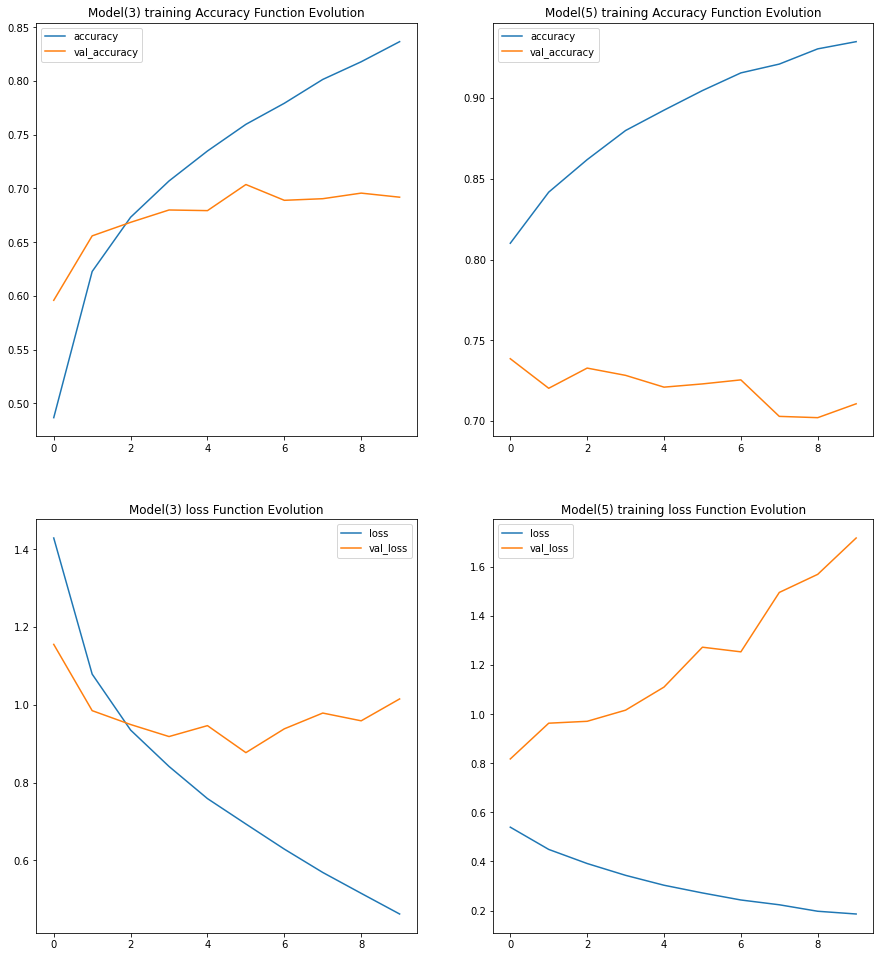

In [243]:
# Comparison between model 3 and 5, using same model but diffeent optimizers 
plt.figure(figsize=(15,35))

plt.subplot(4, 2, 1)
plt.plot(Model3_history.history['accuracy'], label='accuracy')
plt.plot(Model3_history.history['val_accuracy'], label='val_accuracy')
plt.title('Model(3) training Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(Model5_history.history['accuracy'], label='accuracy')
plt.plot(Model5_history.history['val_accuracy'], label='val_accuracy')
plt.title('Model(5) training Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(Model3_history.history['loss'], label='loss')
plt.plot(Model3_history.history['val_loss'], label='val_loss')
plt.title('Model(3) loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(Model5_history.history['loss'], label='loss')
plt.plot(Model5_history.history['val_loss'], label='val_loss')
plt.title('Model(5) training loss Function Evolution')
plt.legend()


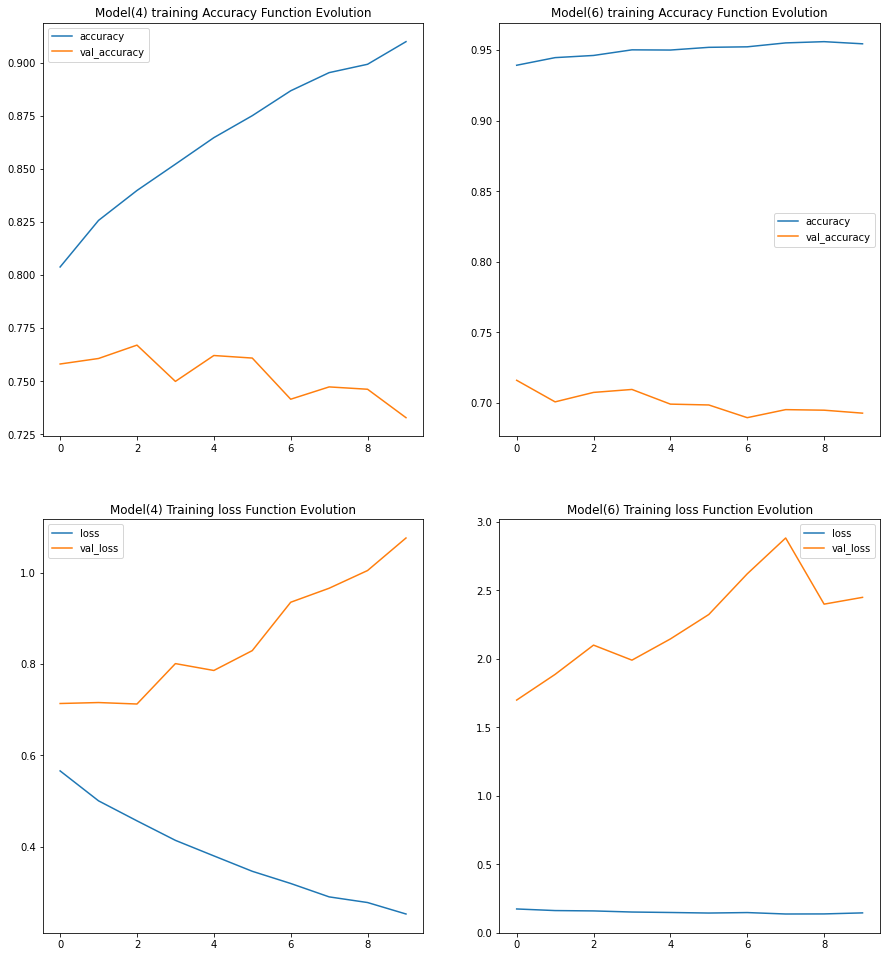

In [244]:
# Comparison between model 4 and 6, using same model but with learning rate 
plt.figure(figsize=(15,35))

plt.subplot(4, 2, 1)
plt.plot(Model4_history.history['accuracy'], label='accuracy')
plt.plot(Model4_history.history['val_accuracy'], label='val_accuracy')
plt.title('Model(4) training Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(Model6_history.history['accuracy'], label='accuracy')
plt.plot(Model6_history.history['val_accuracy'], label='val_accuracy')
plt.title('Model(6) training Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(Model4_history.history['loss'], label='loss')
plt.plot(Model4_history.history['val_loss'], label='val_loss')
plt.title('Model(4) Training loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(Model6_history.history['loss'], label='loss')
plt.plot(Model6_history.history['val_loss'], label='val_loss')
plt.title('Model(6) Training loss Function Evolution')
plt.legend()


In [246]:
model4.compile (loss='sparse_categorical_crossentropy', optimizer= keras.optimizers.Adam(learning_rate=3E-4), metrics=['accuracy'])
# Model training 
Model7_history = model3.fit(train_dataset, train_labels , epochs=10,  
                    validation_data=(test_dataset, test_labels))

Epoch 1/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.1507 - accuracy: 0.9546 - val_loss: 2.7795 - val_accuracy: 0.6903
Epoch 2/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.1534 - accuracy: 0.9546 - val_loss: 3.0611 - val_accuracy: 0.6924
Epoch 3/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.1470 - accuracy: 0.9553 - val_loss: 3.6228 - val_accuracy: 0.6926
Epoch 4/10
1563/1563 [==============================] - 250s 160ms/step - loss: 0.1553 - accuracy: 0.9553 - val_loss: 2.7346 - val_accuracy: 0.6973
Epoch 5/10
1563/1563 [==============================] - 175s 112ms/step - loss: 0.1562 - accuracy: 0.9550 - val_loss: 3.3550 - val_accuracy: 0.7036
Epoch 6/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.1614 - accuracy: 0.9542 - val_loss: 3.2153 - val_accuracy: 0.6952
Epoch 7/10
1563/1563 [==============================] - 110s 71ms/step - loss: 0.1650 - accuracy: 0.9537 - val_loss: 2.